# Finance Sentiment Analysis Project

- Predicting stock prices using data from reddit on the r/wallstreetbets subreddit
- Data courtesy of Gabriel Preda on Kaggle

In [1]:
!which python

/opt/anaconda3/bin/python


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import nltk

from wordcloud import WordCloud

from datetime import date

In [3]:
reddit_data = pd.read_csv('../data/reddit_wsb.csv')
reddit_data.head(5)

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


# EDA and getting to know the dataset

In [4]:
print(reddit_data.columns)
print(reddit_data.shape)
print(reddit_data.dtypes)
print(reddit_data.describe())

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp'],
      dtype='object')
(53187, 8)
title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
timestamp     object
dtype: object
               score     comms_num       created
count   53187.000000  53187.000000  5.318700e+04
mean     1382.461053    263.260252  1.614582e+09
std      7999.271074   2532.665113  4.173566e+06
min         0.000000      0.000000  1.601340e+09
25%         2.000000      3.000000  1.611882e+09
50%        37.000000     17.000000  1.612488e+09
75%       207.000000     60.000000  1.615347e+09
max    348241.000000  93268.000000  1.629095e+09


In [5]:
# Distribution of post lengths

reddit_data['post_length'] = reddit_data['title'].apply(lambda post: len(post))
post_len_dist = px.histogram(reddit_data, x = 'post_length', nbins = 10)
post_len_dist.update_layout(template="plotly_dark")
post_len_dist.show()

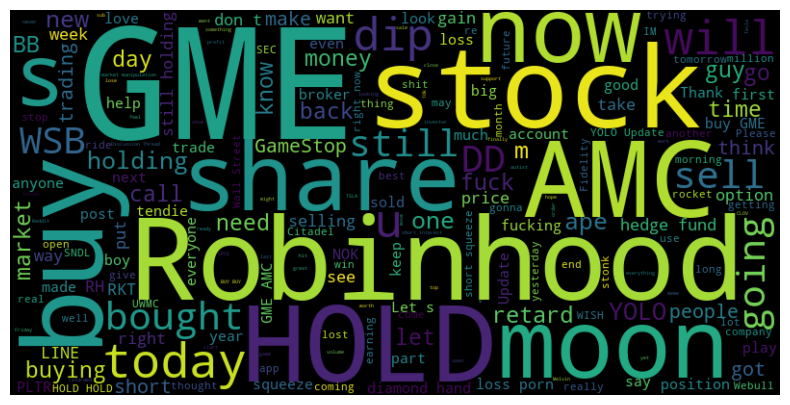

In [6]:
posts = ' '.join(reddit_data['title'].values)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(posts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
reddit_data['timestamp'] = pd.to_datetime(reddit_data['timestamp']).apply(lambda timestamp: timestamp.date())

dates = px.scatter(reddit_data, x = 'timestamp', y = [1] * reddit_data.shape[0])
dates.update_layout(template="plotly_dark")
dates.show()


In [9]:
reddit_data = reddit_data.sort_values(by = 'timestamp', ascending = True).loc[1:].reset_index(drop = True)

In [26]:
date_post_count_data = reddit_data.groupby('timestamp').count().reset_index()

date_post_count_plot = px.scatter(date_post_count_data, x = 'timestamp', y = 'title')
date_post_count_plot.add_scatter(x=date_post_count_data['timestamp'], y=date_post_count_data['title'], mode='lines', name='Line')
date_post_count_plot.update_layout(template="plotly_dark")
date_post_count_plot.show()

In [41]:
date_post_count_data['count_diff'] = date_post_count_data['title'].diff()
date_post_count_data_diff = date_post_count_data.loc[1:][['timestamp','count_diff']]

date_post_count_plot = px.scatter(date_post_count_data_diff, x = 'timestamp', y = 'count_diff')
date_post_count_plot.add_scatter(x=date_post_count_data_diff['timestamp'], y=date_post_count_data_diff['count_diff'], mode='lines', name='Line')
date_post_count_plot.update_layout(template="plotly_dark")
date_post_count_plot.show()